## Dimension Reduction

To visualize 2 dim dataset, we need scatter plot. For 3 dim, 4 dim we can use pair plot to visualize.

What about n-dim data?

It's hard to visualize the n-dim dataset.

Can we transform n-dim data to 2-dim?

Yes, we can achieve this by using PCA and t-SNE method.


### Principal Component Analysis

    . Large number of variables which requires large amount of memory and computational power.
    . Overfitting problem.

PCA reduces the dimension
    d-dim =====convert=====> d'-dim
    
    d'-dim < d-dim
    
#### Intution of PCA
    1. Let's discuss 2 dim features i.e F1 and F2 in where spread of F1 is very less and spread of F2 is very large.
        In this case we can drop the feature F1 as it has less spread. By loosing less spread feature we may loss less information.
        
    2. In another case like mean centric data, in where both F1 and F2 has more spreads. So we can not drop any features here.
    so how can we fix in this scenarios...yes solution is rottate the axis in where maximum data points lies in the line. Rottating F1 to F1' and F2 to F2'.
    
#### How to find F1'?

    . Using unit vector(Variance maximum)
        U1 is an unit vector of F1' and given dataset is D = {xi} after projec dataset becomes D' = {xi'}
        
        xi' = projection of xi on U1 vector
            = U1T .Xi
            
        Here find U1 such that variance of projected dataset should be maximum.
        
        So variance = sum(U1T.xi)^2 / n
    . Using distance minimization
    
        Distance from xi to u1  should be minimal
 #### Eigen values and eigen vectors
 
 Its basically a co-variance matrix contains the eigne values and eigen vectors.
 
S ( dxd) =  X(nxd) . XT(dxn) 
S is square symmetric matrix.   


If we have 10 features and wanted to visualize 3-dim of dataset. Then find the top most 3 eigen vecotrs which will consider as 3-dim datasets.

Below is the PCA steps:

        step1: column standardization of X.
                 This is mean centric transformation in where mean = 0 and standard deviation = 1
        step2: Now get the co-variance matrix. That is symmetrical matrix.
            S(dxd) = XT.X
        step3: Now find the eigen values and eigen vectors (V) from S.
        step4: U1 = V1

% of variance:
    lambada(i) / sum(lambada(i))       here Lambada is eigen value
    
    
Below is the simple example to find the eigen values and eigen vectors using numpy and scikit.

 

### Using numpy

In [1]:
import numpy as np

#### Define a matrix

In [2]:
A = np.array([[1,2],[3,4],[5,6]])

In [3]:
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [4]:
mean = np.mean(A.T, axis=1)

In [5]:
print(mean)

[3. 4.]


In [6]:
c = A - mean

In [7]:
print(c)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


#### Calculate co-variance matrix

In [8]:
v = np.cov(c.T)

In [9]:
print(v)

[[4. 4.]
 [4. 4.]]


In [10]:
eigen_values, eigen_vectors = np.linalg.eig(v)

In [11]:
print(eigen_values)

[8. 0.]


In [12]:
print(eigen_vectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [13]:
# Project data
p = eigen_vectors.T.dot(c.T)

In [14]:
print(p.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### Using scikit

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(2)

In [17]:
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [19]:
print(pca.explained_variance_)

[8.00000000e+00 2.25080839e-33]


In [20]:
# Transform data
B = pca.transform(A)
print(B)

[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


### Load MNIST dataset

Download MNIST data from Kaggle

https://www.kaggle.com/oddrationale/mnist-in-csv


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [22]:
# Read the CSV file

mnist = pd.read_csv('Load_MNIST_Data/mnist_train.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
target = mnist['label']
train_data = mnist.drop('label', axis=1)
print(target.shape)
print(train_data.shape)

(42000,)
(42000, 784)


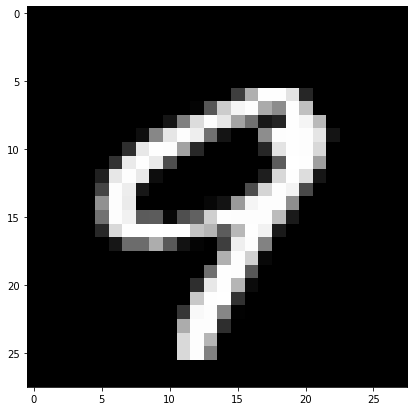

In [24]:
#Print the 100th images data

plt.figure(figsize=(7,7))
grid_data = train_data.iloc[100].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap='gray')

In [25]:
print(target[100])

# Both target and train_data pixel same

9


In [26]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [27]:
standardized_data = StandardScaler().fit_transform(train_data)
print(standardized_data.shape)

(42000, 784)


In [28]:
# Find the covariance matrix i.e AT.A

covar_matrix = np.matmul(standardized_data.T, standardized_data)
print(covar_matrix.shape)

(784, 784)


In [29]:
# Find the top 2 eigen values with correspondence eigen vectors.
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print(vectors.shape)

vectors = vectors.T

(784, 2)


In [30]:
#Projecting the original data sample on the plane
new_coordinates = np.matmul(vectors, standardized_data.T)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, target)).T

(2, 42000)


In [31]:
df = pd.DataFrame(data = new_coordinates, columns=['First_principal', 'Second_principal', 'label'])
print(df.head())

   First_principal  Second_principal  label
0        -5.226445         -5.140478    1.0
1         6.032996         19.292332    0.0
2        -1.705813         -7.644503    1.0
3         5.836139         -0.474207    4.0
4         6.024818         26.559574    0.0


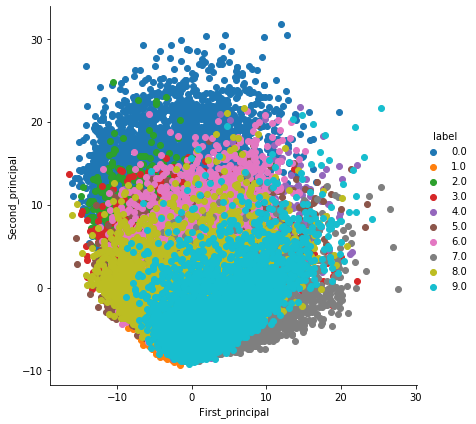

In [32]:
#ploting the 2D data points with seaborn
import seaborn as sns

sns.FacetGrid(df, hue = 'label', size=6).map(plt.scatter, "First_principal", "Second_principal").add_legend()

### Using scikit

In [33]:
from sklearn import decomposition

In [34]:
pca = decomposition.PCA()
pca.n_components=2

In [35]:
pca_data = pca.fit_transform(standardized_data)
print(pca_data.shape)

(42000, 2)


In [36]:
pca_data = np.vstack((pca_data.T, target)).T

In [37]:
pca_df = pd.DataFrame(data = pca_data, columns=['First_principal', 'Second_principal', 'label'])
print(pca_df.head())

   First_principal  Second_principal  label
0        -5.140431         -5.225614    1.0
1        19.292220          6.031537    0.0
2        -7.644535         -1.706292    1.0
3        -0.474142          5.836831    4.0
4        26.559521          6.024134    0.0


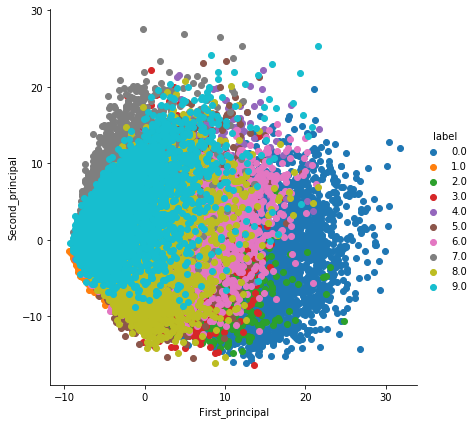

In [38]:
sns.FacetGrid(pca_df, hue = 'label', size=6).map(plt.scatter, "First_principal", "Second_principal").add_legend()

### What is the right d' dimension such that 90 % infomation can explain.

In [39]:
pca.n_components = 784

pca_data = pca.fit_transform(standardized_data)

Text(0, 0.5, 'cum_var_explained')

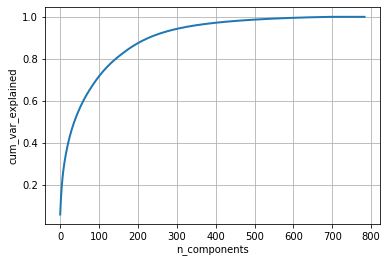

In [40]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(6,4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cum_var_explained')

If d' dim = 100 then pca will explain 75%

d' dim = 200 then pca will explain 90%

d' dim = 350 then pca will explain 95% ..In this case half of the feature reduction happened and gives the significant result. 

### Limitaion of PCA
If dataset is not linear separable, then loss of information is high.

     Information loss is high in sine wave structure of data and in case of group features also.

### t-SNE

t-distributed Stochastic Neighborhood Embedding

Published on 2008

PCA limitation: It does not preserve the local distances between the data points. It keeps the direction in where datasets are maximum variance.

t-SNE stores the local distances of dataset.

High dimension data to convert low dimension is called embedding.


It preserve the neighborhood distances.

Sometimes it is not possible to preserve all the neighborhood distances so it is called crowding problem.

We need to preserve the neighborhood distances using stochastic way.

     Process all the data using iterative way. Every stage it imporves embedding. Iteration should be stopped once data points are not moving to the cluster.
     
     2 parameters are most important.
     
          1. No of iteration ( If more iteration result will be good)
          2. Perplexity ( No of neighbors preserve the distance between neighbors)
          Optional epsilon for optimization.
     
     As perplexity increases, we can see well separation between clusters.
     
     Run with various value of perplexity and try to see the best result.

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2).fit_transform(standardized_data)

In [43]:
tsne_data = np.vstack((tsne.T, target)).T

In [44]:
tsne_df = pd.DataFrame(data = tsne_data, columns = ['Dim1', 'Dim2', 'Label'])

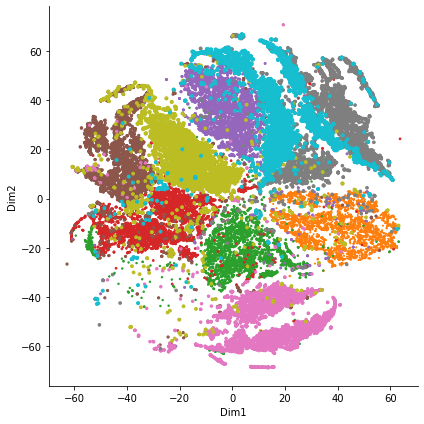

In [48]:
import seaborn as sns
sns.FacetGrid(tsne_df, hue='Label', size=6).map(plt.scatter, 'Dim1', 'Dim2', 'Label')